# Homework #1 Answers

## Chongye Feng

---

### Q1

#### a:

In [1]:
import numpy as np
import pandas as pd
from pylab import *
from mpl_toolkits.mplot3d import axes3d
from scipy.optimize import minimize


In [2]:
np.random.seed(0)

In [3]:
def schwefel(x):
    return 418.9829*len(x) - np.sum(x * np.sin(np.sqrt(np.abs(x))))

In [4]:
def SA(solution,evaluation,delta,boundary,cooling_schedule):
    """ Simulated Annealing for minimization
    solution: np.array. Initial guess of solution
    evaluation: func. Function to evaluate solution
    delta: float. Magnitude of random displacement
    boundary: array of int/float. [lowerbound,upperbound]
    cooling_schedule: np.array. An array of tempretures for simulated annealing
    """
    best_solution=solution.copy()
    lowest_eval=evaluation(best_solution)
    for idx,temp in enumerate(cooling_schedule):
        if idx%500==0:
            print("%d/%d   temp:%f"%(idx,len(cooling_schedule),temp))
        for n in range(len(solution)):
            trial = solution.copy()
            trial[n] += delta*(2*np.random.random()-1)
            if trial[n]>=boundary[0] and trial[n]<=boundary[1]:
                #fill in acceptance criterion
                delta_eval = evaluation(trial) - lowest_eval
                if delta_eval < 0:
                    solution=trial
                else:
                    acceptance_prob = np.exp( -delta_eval / temp)
                    if np.random.random() < acceptance_prob:
                        solution = trial
                if evaluation(solution) < lowest_eval:
                    best_solution = solution.copy()
                    lowest_eval = evaluation(solution)
    return {"solution":best_solution,"evaluation":lowest_eval}

In [5]:
# Define the problem parameters
D = 10
lowerbound = -500
upperbound = 500
boundary = [lowerbound, upperbound]
delta = 0.5

# Define the cooling schedule to 30K
TSA = 3000
Tf_30 = 30
alpha = 0.5
cooling_schedule = np.arange(TSA, Tf_30, -alpha)

# Run the simulated annealing algorithm multiple times and record the best solutions
num_runs = 3
best_solutions = []
for i in range(num_runs):
    # Initialize the solution to a random point within the boundary
    solution = np.random.uniform(lowerbound, upperbound, size=D)
    result = SA(solution, schwefel, delta, boundary, cooling_schedule)
    best_solutions.append(result)

# Print the best solutions found in each run
print("-------")
for i in range(num_runs):
    print(f"Run {i+1}: {best_solutions[i]['evaluation']:.4f} at {best_solutions[i]['solution']}")
    
print('-------')
print(f'The length of schedule of 30K is: {len(cooling_schedule)}')

print('-------')
df = pd.DataFrame(best_solutions)
print(f'The average best results of the 3 runs:',df['evaluation'].mean())

0/5940   temp:3000.000000
500/5940   temp:2750.000000
1000/5940   temp:2500.000000
1500/5940   temp:2250.000000
2000/5940   temp:2000.000000
2500/5940   temp:1750.000000
3000/5940   temp:1500.000000
3500/5940   temp:1250.000000
4000/5940   temp:1000.000000
4500/5940   temp:750.000000
5000/5940   temp:500.000000
5500/5940   temp:250.000000
0/5940   temp:3000.000000
500/5940   temp:2750.000000
1000/5940   temp:2500.000000
1500/5940   temp:2250.000000
2000/5940   temp:2000.000000
2500/5940   temp:1750.000000
3000/5940   temp:1500.000000
3500/5940   temp:1250.000000
4000/5940   temp:1000.000000
4500/5940   temp:750.000000
5000/5940   temp:500.000000
5500/5940   temp:250.000000
0/5940   temp:3000.000000
500/5940   temp:2750.000000
1000/5940   temp:2500.000000
1500/5940   temp:2250.000000
2000/5940   temp:2000.000000
2500/5940   temp:1750.000000
3000/5940   temp:1500.000000
3500/5940   temp:1250.000000
4000/5940   temp:1000.000000
4500/5940   temp:750.000000
5000/5940   temp:500.000000
5500/

In [6]:
# Define the cooling schedule to 10K
TSA = 3000
Tf_10 = 10
alpha = 0.5
cooling_schedule = np.arange(TSA, Tf_10, -alpha)

# Run the simulated annealing algorithm multiple times and record the best solutions
num_runs = 3
best_solutions = []
for i in range(num_runs):
    # Initialize the solution to a random point within the boundary
    solution = np.random.uniform(lowerbound, upperbound, size=D)
    result = SA(solution, schwefel, delta, boundary, cooling_schedule)
    best_solutions.append(result)

# Print the best solutions found in each run
print("-------")
for i in range(num_runs):
    print(f"Run {i+1}: {best_solutions[i]['evaluation']:.4f} at {best_solutions[i]['solution']}")
    
print('-------')
print(f'The length of schedule of 10K is: {len(cooling_schedule)}')


print('-------')
df = pd.DataFrame(best_solutions)
print(f'The average best results of the 3 runs:',df['evaluation'].mean())

0/5980   temp:3000.000000
500/5980   temp:2750.000000
1000/5980   temp:2500.000000
1500/5980   temp:2250.000000
2000/5980   temp:2000.000000
2500/5980   temp:1750.000000
3000/5980   temp:1500.000000
3500/5980   temp:1250.000000
4000/5980   temp:1000.000000
4500/5980   temp:750.000000
5000/5980   temp:500.000000
5500/5980   temp:250.000000
0/5980   temp:3000.000000
500/5980   temp:2750.000000
1000/5980   temp:2500.000000
1500/5980   temp:2250.000000
2000/5980   temp:2000.000000
2500/5980   temp:1750.000000
3000/5980   temp:1500.000000
3500/5980   temp:1250.000000
4000/5980   temp:1000.000000
4500/5980   temp:750.000000
5000/5980   temp:500.000000
5500/5980   temp:250.000000
0/5980   temp:3000.000000
500/5980   temp:2750.000000
1000/5980   temp:2500.000000
1500/5980   temp:2250.000000
2000/5980   temp:2000.000000
2500/5980   temp:1750.000000
3000/5980   temp:1500.000000
3500/5980   temp:1250.000000
4000/5980   temp:1000.000000
4500/5980   temp:750.000000
5000/5980   temp:500.000000
5500/

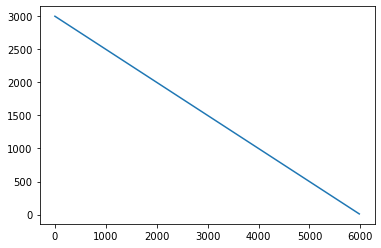

In [7]:
plt.plot(cooling_schedule)
plt.show()

To 30K: 3961.8605504437824

To 10K: 3234.375529430725

It shows that, on average, it would be a better solution when it is cooling to the lower temperature for the linear cooling schedule.

#### b:

In [8]:
TSA = 3000
sigma = 1000 # sigma value for logarithmic cooling
k = 6000 # counter for number of cooling cycles

# Perform simulated annealing with the given parameters
cooling_schedule = [TSA / (1 + TSA * np.log(1 + i) / (3 * sigma)) for i in range(k)]
T_final = TSA / (1 + TSA * np.log(6000 + i) / (3 * sigma))

num_runs = 3
best_solutions = []
for i in range(num_runs):
    # Initialize the solution to a random point within the boundary
    solution = np.random.uniform(lowerbound, upperbound, size=D)
    result = SA(solution, schwefel, delta, boundary, cooling_schedule)
    best_solutions.append(result)

# Print the best solutions found in each run
print("-------")
print('For TSA = 3000K:')
for i in range(num_runs):
    print(f"Run {i+1}: {best_solutions[i]['evaluation']:.4f} at {best_solutions[i]['solution']}")
    

print('-------')
df = pd.DataFrame(best_solutions)
print(f'The average best results of the 3 runs:',df['evaluation'].mean())

print('-------')
print(f'Final temperature:',T_final, "K")

0/6000   temp:3000.000000
500/6000   temp:415.707877
1000/6000   temp:379.326466
1500/6000   temp:360.842054
2000/6000   temp:348.780336
2500/6000   temp:339.964687
3000/6000   temp:333.085339
3500/6000   temp:327.482176
4000/6000   temp:322.778491
4500/6000   temp:318.740173
5000/6000   temp:315.212364
5500/6000   temp:312.087616
0/6000   temp:3000.000000
500/6000   temp:415.707877
1000/6000   temp:379.326466
1500/6000   temp:360.842054
2000/6000   temp:348.780336
2500/6000   temp:339.964687
3000/6000   temp:333.085339
3500/6000   temp:327.482176
4000/6000   temp:322.778491
4500/6000   temp:318.740173
5000/6000   temp:315.212364
5500/6000   temp:312.087616
0/6000   temp:3000.000000
500/6000   temp:415.707877
1000/6000   temp:379.326466
1500/6000   temp:360.842054
2000/6000   temp:348.780336
2500/6000   temp:339.964687
3000/6000   temp:333.085339
3500/6000   temp:327.482176
4000/6000   temp:322.778491
4500/6000   temp:318.740173
5000/6000   temp:315.212364
5500/6000   temp:312.087616
-

In [9]:
TSA = 6000
sigma = 1000 # sigma value for logarithmic cooling
k = 6000 # counter for number of cooling cycles

# Perform simulated annealing with the given parameters
cooling_schedule = [TSA / (1 + TSA * np.log(1 + i) / (3 * sigma)) for i in range(k)]
T_final = TSA / (1 + TSA * np.log(6000 + i) / (3 * sigma))

num_runs = 3
best_solutions = []
for i in range(num_runs):
    # Initialize the solution to a random point within the boundary
    solution = np.random.uniform(lowerbound, upperbound, size=D)
    result = SA(solution, schwefel, delta, boundary, cooling_schedule)
    best_solutions.append(result)

# Print the best solutions found in each run
print("-------")
print('For TSA = 6000K:')
for i in range(num_runs):
    print(f"Run {i+1}: {best_solutions[i]['evaluation']:.4f} at {best_solutions[i]['solution']}")
    

print('-------')
df = pd.DataFrame(best_solutions)
print(f'The average best results of the 3 runs:',df['evaluation'].mean())

print('-------')
print(f'Final temperature:',T_final, "K")

0/6000   temp:6000.000000
500/6000   temp:446.654152
1000/6000   temp:404.926346
1500/6000   temp:383.931847
2000/6000   temp:370.306260
2500/6000   temp:360.384346
3000/6000   temp:352.663160
3500/6000   temp:346.388168
4000/6000   temp:341.130065
4500/6000   temp:336.622703
5000/6000   temp:332.690384
5500/6000   temp:329.211417
0/6000   temp:6000.000000
500/6000   temp:446.654152
1000/6000   temp:404.926346
1500/6000   temp:383.931847
2000/6000   temp:370.306260
2500/6000   temp:360.384346
3000/6000   temp:352.663160
3500/6000   temp:346.388168
4000/6000   temp:341.130065
4500/6000   temp:336.622703
5000/6000   temp:332.690384
5500/6000   temp:329.211417
0/6000   temp:6000.000000
500/6000   temp:446.654152
1000/6000   temp:404.926346
1500/6000   temp:383.931847
2000/6000   temp:370.306260
2500/6000   temp:360.384346
3000/6000   temp:352.663160
3500/6000   temp:346.388168
4000/6000   temp:341.130065
4500/6000   temp:336.622703
5000/6000   temp:332.690384
5500/6000   temp:329.211417
-

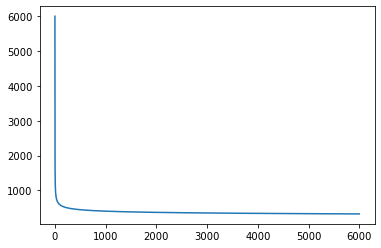

In [10]:
plt.plot(cooling_schedule)
plt.show()

For TSA = 3000K: 3509.492857222181
    
For TSA = 6000K: 4226.152417437889
    
It shows that, on average, it would be a better solution when it is cooling from the lower temperature for the logarithmic cooling schedule.

Comparing it with the linear cooling schedule, the final temperature of the logarithmic cooling schedules are both above 300 K, but the linear cooling schedules are to 10 K and 30 K. But in the case of 3000K to 300K logarithmic cooling schedule, the final result is lower than the case of 3000K to 30K linear cooling schedule. We know that the lower the final temperature, the lower the result would be. So, we might be able to conclude that logarithmic cooling schedule is better than linear cooling schedule in the same T_SA range. Additionally, the logarithmic cooling schedule is able to find the global minimum with fewer iterations.

#### c:

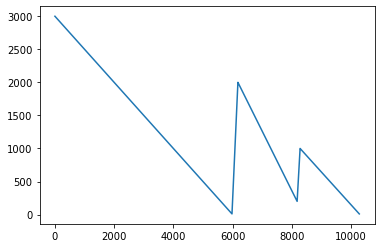

In [11]:
TSA = 3000
Tf_10 = 10
alpha = 0.5
cooling_schedule = np.arange(TSA, Tf_10, -alpha)

schedule=np.append(cooling_schedule,np.linspace(cooling_schedule[-1],2000,200))
schedule=np.append(schedule,np.linspace(schedule[-1],200,2000))
schedule=np.append(schedule,np.linspace(schedule[-1],1000,100))
schedule=np.append(schedule,np.linspace(schedule[-1],10,2000))

plt.plot(schedule)
plt.show()

In [12]:
num_runs = 3
best_solutions = []
for i in range(num_runs):
    # Initialize the solution to a random point within the boundary
    solution = np.random.uniform(lowerbound, upperbound, size=D)
    result = SA(solution, schwefel, delta, boundary, schedule)
    best_solutions.append(result)

# Print the best solutions found in each run
print("-------")
print('For customized cooling schedule:')
for i in range(num_runs):
    print(f"Run {i+1}: {best_solutions[i]['evaluation']:.4f} at {best_solutions[i]['solution']}")
    

print('-------')
df = pd.DataFrame(best_solutions)
print(f'The average best results of the 3 runs:',df['evaluation'].mean())

print('-------')
print(f'The length of schedule of 10K is: {len(schedule)}')

0/10280   temp:3000.000000
500/10280   temp:2750.000000
1000/10280   temp:2500.000000
1500/10280   temp:2250.000000
2000/10280   temp:2000.000000
2500/10280   temp:1750.000000
3000/10280   temp:1500.000000
3500/10280   temp:1250.000000
4000/10280   temp:1000.000000
4500/10280   temp:750.000000
5000/10280   temp:500.000000
5500/10280   temp:250.000000
6000/10280   temp:210.449749
6500/10280   temp:1711.855928
7000/10280   temp:1261.630815
7500/10280   temp:811.405703
8000/10280   temp:361.180590
8500/10280   temp:891.045523
9000/10280   temp:643.421711
9500/10280   temp:395.797899
10000/10280   temp:148.174087
0/10280   temp:3000.000000
500/10280   temp:2750.000000
1000/10280   temp:2500.000000
1500/10280   temp:2250.000000
2000/10280   temp:2000.000000
2500/10280   temp:1750.000000
3000/10280   temp:1500.000000
3500/10280   temp:1250.000000
4000/10280   temp:1000.000000
4500/10280   temp:750.000000
5000/10280   temp:500.000000
5500/10280   temp:250.000000
6000/10280   temp:210.449749
6

In [13]:
result = minimize(schwefel, best_solutions[0]['solution'], method='Nelder-Mead')
print('Global minimum found by Nelder-Mead: %f' % result.fun)
print('Solution after Nelder-Mead: %s' % result.x)

Global minimum found by Nelder-Mead: 1065.963108
Solution after Nelder-Mead: [ 203.81426206  420.96871163  203.81425019 -559.14859142 -302.52493673
 -302.52493534 -302.52492762 -124.82935708 -302.52498664  420.96869674]


I customized the linear cooling schedule by adding some more heating-cooling cycles, the final temperature was set to 10K. But the "global minimum" reached was not lower than the original linear cooling schedule. It might be because that, at the last cooling, the cooling rate of the customized schedule was faster than the original one, so it is not better than the original schedule. 

On the other hand, by using a local optimization technique, a better solution was reached. 

Global minimum found by Nelder-Mead: 1658.681296

---

### Q2:

In [14]:
wines_df = pd.read_csv('wines.csv')

In [15]:
wines_df.head()
#wines_df['k'] = wines_df['Start assignment'] - wines_df['ranking']

,Alcohol %,Malic Acid,Ash,Alkalinity,Mg,Phenols,Flavanoids,Phenols.1,Proantho-cyanins,Color intensity,Hue,OD280 315,Proline,Start assignment,ranking
0,14.23,1.71,2.43,15.6,127,2.8,3.06,0.28,2.29,5.64,1.04,3.92,1065,1,1
1,13.24,2.59,2.87,21.0,118,2.8,2.69,0.39,1.82,4.32,1.04,2.93,735,1,1
2,14.83,1.64,2.17,14.0,97,2.8,2.98,0.29,1.98,5.20,1.08,2.85,1045,1,1
3,14.12,1.48,2.32,16.8,95,2.2,2.43,0.26,1.57,5.00,1.17,2.82,1280,1,1
4,13.75,1.73,2.41,16.0,89,2.6,2.76,0.29,1.81,5.60,1.15,2.90,1320,1,1


#### a:

In [16]:
from scipy.stats import zscore

In [17]:
# Z = (x - mean) / std
wines_norm = wines_df.apply(zscore)

In [18]:
wines_norm.head()

,Alcohol %,Malic Acid,Ash,Alkalinity,Mg,Phenols,Flavanoids,Phenols.1,Proantho-cyanins,Color intensity,Hue,OD280 315,Proline,Start assignment,ranking
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,-1.243905,-1.213944
1,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874,-1.243905,-1.213944
2,2.259772,-0.625086,-0.718336,-1.650049,-0.192495,0.808997,0.954502,-0.578985,0.681738,0.061386,0.537671,0.336606,0.949319,-1.243905,-1.213944
3,1.382733,-0.768712,-0.170035,-0.809251,-0.332922,-0.152402,0.402320,-0.820719,-0.036617,-0.025128,0.932531,0.294232,1.697675,-1.243905,-1.213944
4,0.925685,-0.544297,0.158946,-1.049479,-0.754202,0.488531,0.733629,-0.578985,0.383884,0.234414,0.844785,0.407228,1.825055,-1.243905,-1.213944


#### b:

In [19]:
chemical_norm = wines_norm.iloc[:,:-1]
centroids = chemical_norm.groupby(chemical_norm['Start assignment']).mean()
centroids.index = [1, 2, 3]
centroids

,Alcohol %,Malic Acid,Ash,Alkalinity,Mg,Phenols,Flavanoids,Phenols.1,Proantho-cyanins,Color intensity,Hue,OD280 315,Proline
1,-0.026321,-0.022878,0.039202,-0.011425,0.001197,0.046232,-0.014499,-0.092738,0.015342,-0.122680,0.072159,-0.021132,-0.001088
2,-0.030284,-0.043279,-0.117993,-0.122667,-0.180594,-0.110306,-0.040446,0.035593,-0.147087,-0.218465,0.084808,0.077818,-0.085479
3,0.054317,0.063613,0.076850,0.129509,0.173535,0.062731,0.052907,0.053751,0.127677,0.327948,-0.150638,-0.055173,0.083711


In [20]:
centroids.shape

(3, 13)

#### c:

In [21]:
clusters = wines_df['Start assignment']
distances = pd.DataFrame(index=np.arange(0, 178))
# distances.shape
starts = list(centroids.index.values)
chemical_norm = wines_norm.iloc[:,:-2]

distances['centroid 1'] = np.reshape([clusters == starts[0]], (178, 1))
distances['centroid 2'] = np.reshape([clusters == starts[1]], (178, 1))
distances['centroid 3'] = np.reshape([clusters == starts[2]], (178, 1))

distances['centroid 1'] = distances['centroid 1']*(((chemical_norm - centroids.iloc[0])**2).sum(axis=1))
distances['centroid 2'] = distances['centroid 2']*(((chemical_norm - centroids.iloc[1])**2).sum(axis=1))
distances['centroid 3'] = distances['centroid 3']*(((chemical_norm - centroids.iloc[2])**2).sum(axis=1))

distances.values.sum()

2288.204358862849

The value of the cost function is 2288.204358862849.

#### d:

In [23]:
def helper(feats, rank, centers):
    # distances.shape
    w = pd.DataFrame(index=np.arange(0, 178))
    d = pd.DataFrame()
    starts = list(centers.index.values)
    chemical_norm = wines_norm.iloc[:,:-2]

    w['centroid 1'] = np.reshape([rank == starts[0]], (178, 1)).astype(int)
    w['centroid 2'] = np.reshape([rank == starts[1]], (178, 1)).astype(int)
    w['centroid 3'] = np.reshape([rank == starts[2]], (178, 1)).astype(int)
    
    d['1'] = (((feats - centers.iloc[0])**2).sum(axis=1))
    d['2'] = (((feats - centers.iloc[1])**2).sum(axis=1))
    d['3'] = (((feats - centers.iloc[2])**2).sum(axis=1))
    
    result = w.to_numpy() * d.to_numpy()
    
    return result.sum()
    

#     distances['centroid 1'] = distances['centroid 1']*(((feats - centers.iloc[0])**2).sum(axis=1))
#     distances['centroid 2'] = distances['centroid 2']*(((feats - centers.iloc[1])**2).sum(axis=1))
#     distances['centroid 3'] = distances['centroid 3']*(((feats - centers.iloc[2])**2).sum(axis=1))

#     return distances.values.sum()
    

In [24]:
def simulated_annealing_q2(feats, ranks, centers, start_temp, alpha, steps=10000):
    """ Simulated Annealing for clustering
    feats: pd.DataFrame. Normalized chemical descriptors
    ranks: np.array shape(178,). Initial assignment.
    centers: np.array shape (3,13). Fixed centers
    start_temp: float. Initial temperature
    alpha: float. Hyperparameter for geometric cooling
    steps: int.
    """
    best_rank = ranks.copy()
    # evaluate the cost function with current best rank
    lowest_eval = helper(feats,ranks,centers)
    # temp = start_temp
    for step in (range(steps)):
        # update temperature according to geometric cooling schedule
        temp = start_temp * (alpha**(step + 1))
#         print(step)
        if step % 500 == 0:
            print(step, temp, lowest_eval)
        for n in range(len(ranks)):
            trial = ranks.copy()
            rand_choice=np.random.randint(3)+1
            trial[n]=rand_choice
            # Metropolis acceptance criterion
            if np.exp(-delta / temp) > np.random.rand():
                ranks = trial
                # update evaluation
                new_eval = helper(feats,ranks,centers)
                if new_eval < lowest_eval:
                    # update best rank and lowest_eval
                    lowest_eval = new_eval
                    best_rank = ranks.copy()
                    print('Better')
    return {"solution": best_rank, "evaluation": lowest_eval}


In [29]:
def validate(solution,df):
    """Prints out how many wines are corretly assigned to its cultivar
    solution: np.array shape(178,). Your solution.
    df: pd.DataFrame. Read-in of the wines.csv dataset
    """
    # correct classification
    ranking = df['ranking'].values
    cluster_1 = list(df[df['ranking']==1].index)
    cluster_2 = list(df[df['ranking']==2].index)
    cluster_3 = list(df[df['ranking']==3].index)
    clusters =[cluster_1,cluster_2,cluster_3]

    for i in range(1,4):
        #loop over solutions
        counts=[]
        scores=[]
        for j in range(3):
            #loop over clusters of true assignments
            sol_i= [idx for idx,k in enumerate(solution) if k==i]
            counts.append(len(np.intersect1d(sol_i, clusters[j])))
            scores.append(counts[-1]/len(clusters[j]))
        idx = np.argmax(scores)
        print(f'Class {i} - cultivar {idx+1}: {counts[idx]} out \
of {len(clusters[idx])} are classified correctly')

In [30]:
feats = chemical_norm
ranks = wines_df.iloc[:,-1]
centers = centroids

start_temp = 500
alpha = 0.999
steps = 5000

# Run simulated annealing
solutions = []
for i in range(3):
    solution = simulated_annealing_q2(feats, ranks, centers, start_temp, alpha, steps=steps)
    solutions.append(solution)
    validate(solution['solution'],wines_df)

0 499.5 2217.581532688826
Better
500 302.88628295816176 2216.918002126524
1000 183.66386467309636 2216.918002126524
1500 111.3699004695996 2216.918002126524
2000 67.53236273605097 2216.918002126524
2500 40.95020285986938 2216.918002126524
3000 24.831340802019064 2216.918002126524
3500 15.057202235016803 2216.918002126524
4000 9.130370403830963 2216.918002126524
4500 5.536464371666808 2216.918002126524
Class 1 - cultivar 1: 58 out of 59 are classified correctly
Class 2 - cultivar 2: 71 out of 71 are classified correctly
Class 3 - cultivar 3: 48 out of 48 are classified correctly
0 499.5 2217.581532688826
Better
500 302.88628295816176 2216.918002126524
1000 183.66386467309636 2216.918002126524
1500 111.3699004695996 2216.918002126524
2000 67.53236273605097 2216.918002126524
2500 40.95020285986938 2216.918002126524
3000 24.831340802019064 2216.918002126524
3500 15.057202235016803 2216.918002126524
4000 9.130370403830963 2216.918002126524
4500 5.536464371666808 2216.918002126524
Class 1 - 

In [34]:
T_final = 500 * 0.999**(5000)
T_final

3.360555979932794

solution['solution'] would be the solutions of the global minimun reached by the CSA algorithm after 5000 steps of linear cooling. The solutions are verified by the provided validation code. The converging performance of this method is not very well. Only one better solution was found by this algorithm, the evaluation of the solution is 2216.918002126524. The speed performance of this method is bad as well, it would take more than half an hour to finish 5000 steps, even after robust optimization using all numpy.

#### e:

In [31]:
def simulated_annealing_q2_e(feats, ranks, centers, start_temp, alpha, steps=10000):
    """ Simulated Annealing for clustering
    feats: pd.DataFrame. Normalized chemical descriptors
    ranks: np.array shape(178,). Initial assignment.
    centers: np.array shape (3,13). Fixed centers
    start_temp: float. Initial temperature
    alpha: float. Hyperparameter for geometric cooling
    steps: int.
    """
    best_ranks = ranks.copy()
    lowest_eval = helper(feats,ranks,centers)
    delta = 0.01
    for step in range(steps):
        temp = start_temp * (alpha ** step)
        if step % 500 == 0:
            print(step, temp, lowest_eval)
            
        # Update centers
        new_centers = centers.copy()
        for j in range(3):
            for k in range(13):
                new_centers.iloc[j, k] += (2 * np.random.random() - 1) * 0.01
        
        # Update new ranks
        dist = np.zeros((178, 3))
        for i in range(178):
            for j in range(3):
                dist[i, j] = ((feats.iloc[i] - centers.iloc[j]) ** 2).sum()
        new_ranks = np.argmin(dist, axis=1) + 1
        
        new_eval = helper(feats,new_ranks,new_centers)
        if new_eval < lowest_eval:
            # update best rank and lowest_eval
            best_rank = ranks.copy()
            lowest_eval = new_eval
            centers = new_centers.copy()
        else:
            prob = np.exp(-(new_eval - lowest_eval) / temp)
            if np.random.random() < prob:
                # accept the new state
                lowest_eval = new_eval
                best_rank = new_ranks.copy()
                centers = new_centers.copy()

    return {"solution":best_ranks,"evaluation":lowest_eval, 'centers': centers}

In [32]:
feats = chemical_norm
ranks = wines_df.iloc[:,-1]
centers = centroids

start_temp = 500
alpha = 0.999
steps = 5000

# Run simulated annealing
#solutions = []
for i in range(3):
    solution = simulated_annealing_q2_e(feats, ranks, centers, start_temp, alpha, steps=steps)
    solutions.append(solution)
    validate(solution['solution'],wines_df)

0 500.0 2217.581532688826
500 303.18947243059233 2097.4739512972674
1000 183.84771238548186 2116.898734287846
1500 111.48138185145105 2097.5197134696373
2000 67.59996269874972 2166.135302055775
2500 40.9911940539233 2179.3141722784044
3000 24.85619699901808 2152.6682733759444
3500 15.07227450952633 2145.676897338066
4000 9.139509913744707 2114.8580342683927
4500 5.542006378044853 2044.6211888921155
Class 1 - cultivar 1: 59 out of 59 are classified correctly
Class 2 - cultivar 2: 71 out of 71 are classified correctly
Class 3 - cultivar 3: 48 out of 48 are classified correctly
0 500.0 2217.581532688826
500 303.18947243059233 2161.453045393643
1000 183.84771238548186 2163.9640192180404
1500 111.48138185145105 2233.969939758107
2000 67.59996269874972 2242.288236105295
2500 40.9911940539233 2296.199677317221
3000 24.85619699901808 2257.5975774500794
3500 15.07227450952633 2261.0557164357606
4000 9.139509913744707 2243.3923157062954
4500 5.542006378044853 2183.366731735778
Class 1 - cultivar

Comparing the solution of 2e and 2d, the solution of 2e is better. All solutions are validated by the validation code. 

In [37]:
print(solutions)

[{'solution': 0      3
1      1
2      1
3      1
4      1
      ..
173    3
174    3
175    3
176    3
177    2
Name: ranking, Length: 178, dtype: int64, 'evaluation': 2216.918002126524}, {'solution': 0      3
1      1
2      1
3      1
4      1
      ..
173    3
174    3
175    3
176    3
177    2
Name: ranking, Length: 178, dtype: int64, 'evaluation': 2216.918002126524}, {'solution': 0      1
1      1
2      1
3      1
4      1
      ..
173    3
174    3
175    3
176    3
177    2
Name: ranking, Length: 178, dtype: int64, 'evaluation': 2217.581532688826}, {'solution': 0      1
1      1
2      1
3      1
4      1
      ..
173    3
174    3
175    3
176    3
177    2
Name: ranking, Length: 178, dtype: int64, 'evaluation': 1970.6614063636002, 'centers':    Alcohol %  Malic Acid       Ash  Alkalinity        Mg   Phenols  \
1   0.112459    0.003686  0.439532   -0.074550  0.132625  0.298491   
2  -0.323878    0.350370 -0.341128   -0.548816  0.018170 -0.093369   
3  -0.085631   -0.008116  

The first 3 was the solutions of 2d, the last 3 with new centroids are the solutions of 2e.